In [81]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root = '/home/jovyan/work'

In [65]:
sleep = pd.read_csv(root + '/Downloads/sleep.csv')

In [75]:
sleep['hours'] = (pd.to_datetime(sleep['wake']) - pd.to_datetime(sleep['sleep'])).dt.seconds / 3600

In [78]:
sleep_hours_mean = sleep['hours'].mean()
sleep_hours_mean

7.577058644788818

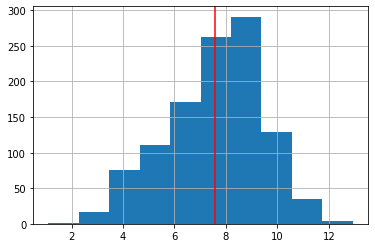

In [82]:
ax = sleep['hours'].hist()
plt.axvline(sleep_hours_mean, color='r')

In [87]:
sleep['day_of_week'] = pd.to_datetime(sleep['wake']).dt.dayofweek

In [89]:
means = sleep.groupby('day_of_week').mean()
means

,exercise_hours,mood,hours
day_of_week,,,
0,1.617333,5.708955,8.478875
1,0.112263,5.496269,7.867410
2,0.069590,5.500000,7.906838
3,1.681496,5.792683,8.605769
4,0.108321,5.671756,7.686518
5,0.115077,5.576923,5.816348
6,1.242932,5.330769,6.686306


In [105]:
def fill_missing(row):
    if np.isnan(row['exercise_hours']):
        day = row['day_of_week']
        row['exercise_hours'] = means.loc[day]['exercise_hours']
    return row
    
sleep = sleep.apply(fill_missing, axis=1)
sleep[sleep['exercise_hours'].isnull()]

,sleep,wake,exercise_hours,mood,hours,day_of_week


In [119]:
missing = sleep[sleep['mood'].isnull()]

def get_start(row):
    idx = row.name - 1
    
    while idx >= 0:
        prev_mood = sleep.iloc[idx]['mood']
        if not np.isnan(prev_mood):
            return idx, prev_mood

    raise Exception('no point found')

    
def get_end(row):
    idx = row.name + 1
    
    while idx < len(sleep):
        next_mood = sleep.iloc[idx]['mood']
        if not np.isnan(next_mood):
            return idx, next_mood

    raise Exception('no point found')

    
def fill_mood(row):
    if np.isnan(row['mood']):
        start_idx, start_mood = starts[row.name]
        end_idx, end_mood = ends[row.name]        
        
        row['mood'] = (end_mood - start_mood) / (end_idx - start_idx)
    return row

starts = missing.apply(get_start, axis=1)      

KeyboardInterrupt: 

In [ ]:
ends = missing.apply(get_end, axis=1)  

In [ ]:
sleep = sleep.apply(fill_mood, axis=1)

In [ ]:
sleep['mood'].plot(kind='line')

In [ ]:
sleep['mood_change'] = sleep['mood'] - sleep['mood'].shift(-1)

# Step 1

In [9]:
df = pd.read_csv(root + '/Downloads/trees.csv')
train = df.iloc[:500]
test = df.iloc[500:]

assert len(test) == 250

In [10]:
class Leaf:
    def __init__(self, label):
        self.label = label
        
class Node:
    def __init__(self, column, split_value, left_subtree, right_subtree):
        self.column = column
        self.split_value = split_value 
        self.left_subtree = left_subtree 
        self.right_subtree = right_subtree

In [12]:
type(Leaf(1)) == Leaf

True

# Step 2

In [20]:
def predict(node, x): 
    while True:
        if x[node.column] <= node.split_value:
            if type(node.left_subtree) == Leaf:
                return node.left_subtree.label
            else:
                node = node.left_subtree
        else:
            if type(node.right_subtree) == Leaf:
                return node.right_subtree.label
            else:
                node = node.right_subtree
        

test_tree = Node(0, 5.6, Leaf(0), Node(2, 5.0, Leaf(1), Leaf(2)))

for expected, idx in [(2, 0), (1, 1), (0, 2)]:
    test_x = train.iloc[idx][:4].values
    assert predict(test_tree, test_x) == expected
        

# Step 3

In [51]:
def majority(labels):
    counts = [{'count': 1, 'label': label} for label in labels]
    counts = pd.DataFrame(counts).groupby('label').count()
    max_count = counts.max().values[0]
    max_counts = counts[counts['count'] == max_count]
    return max_counts.sample(1).index[0]

for num in range(10):
    label = majority([1, 2, 3, 3, 4, 4])
    print(label)

4
4
3
4
3
4
3
4
3
4


In [64]:
def find_split_column(matrix):
    matrix = np.array(matrix)
    column_idxs_with_unique = []
    for idx in range(len(matrix[0])):
        column = matrix[:, idx]
        if len(np.unique(column)) >= 2:
            column_idxs_with_unique.append(idx)
    
    return np.random.choice(column_idxs_with_unique)

find_split_column([
    [0, 1, 1],
    [0, 1, 0]
])

2

In [ ]:
from collections import Counter

def build_tree(x, y):
    if len(x) == 0:
        raise Exception()
    elif len(x) <= 5 or len(np.unique(y)) == 0:
        return Leaf(Counter(y).most_common(1))
    else:
        column = find_split_column(x)
        col_min = np.min(x[column])
        col_max = 
        split_value = 
        return Node(column)